# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 100)

# Dataset Overview

Goals : Predict whether the customer of Telco company will be churn or not

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [3]:
print(f'this dataset contains of {df.shape[0]} rows and {df.shape[1]} columns')

this dataset contains of 7032 rows and 21 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
# check duplicate 
df.duplicated().sum()

0

# Exploratory Data Analysis

In [7]:
eda = df.copy()

cat = eda.select_dtypes(include='object').columns
num = eda.select_dtypes(include='number').columns

In [11]:
cat

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

## Univariate Analysis

### Descriptive Statistic

In [8]:
eda[num].describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

### Numerical Univariate Analysis

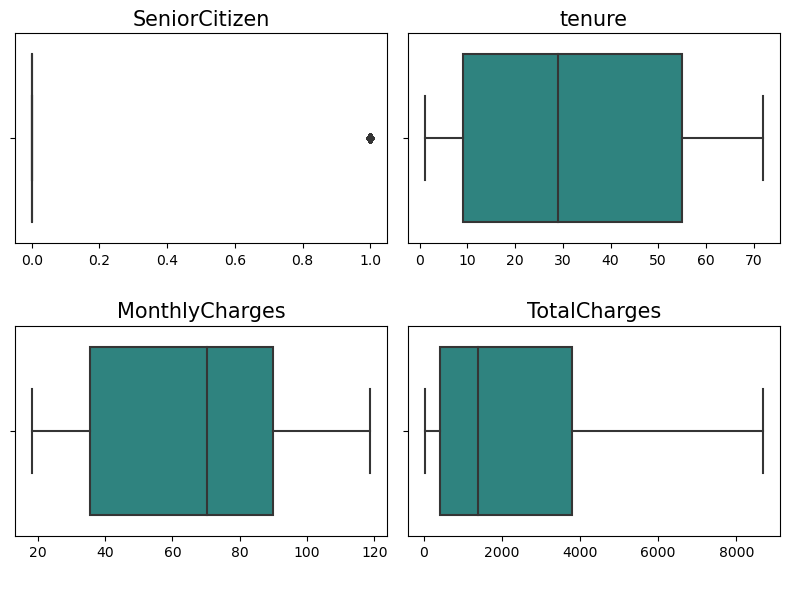

In [10]:
plt.figure(figsize=(8,6))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

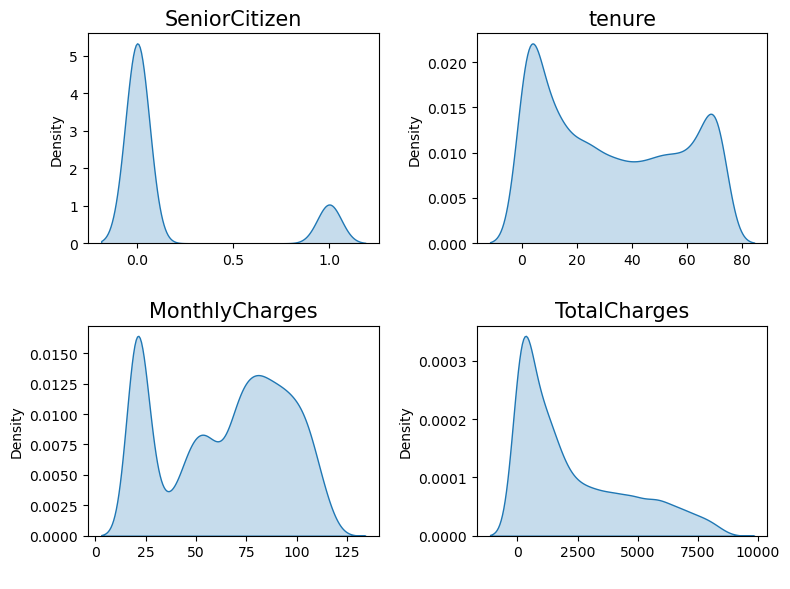

In [13]:
plt.figure(figsize=(8,6))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

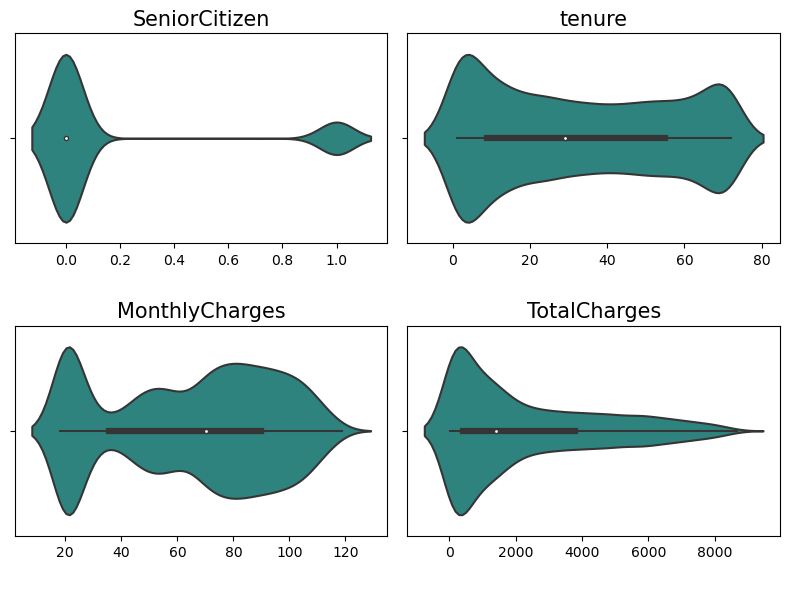

In [14]:
plt.figure(figsize=(8,6))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

### Categorical Univariate Analysis

In [15]:
eda[cat].nunique()

customerID          7032
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [19]:
# remove id
cats = cat[1:]
len(cats)

16

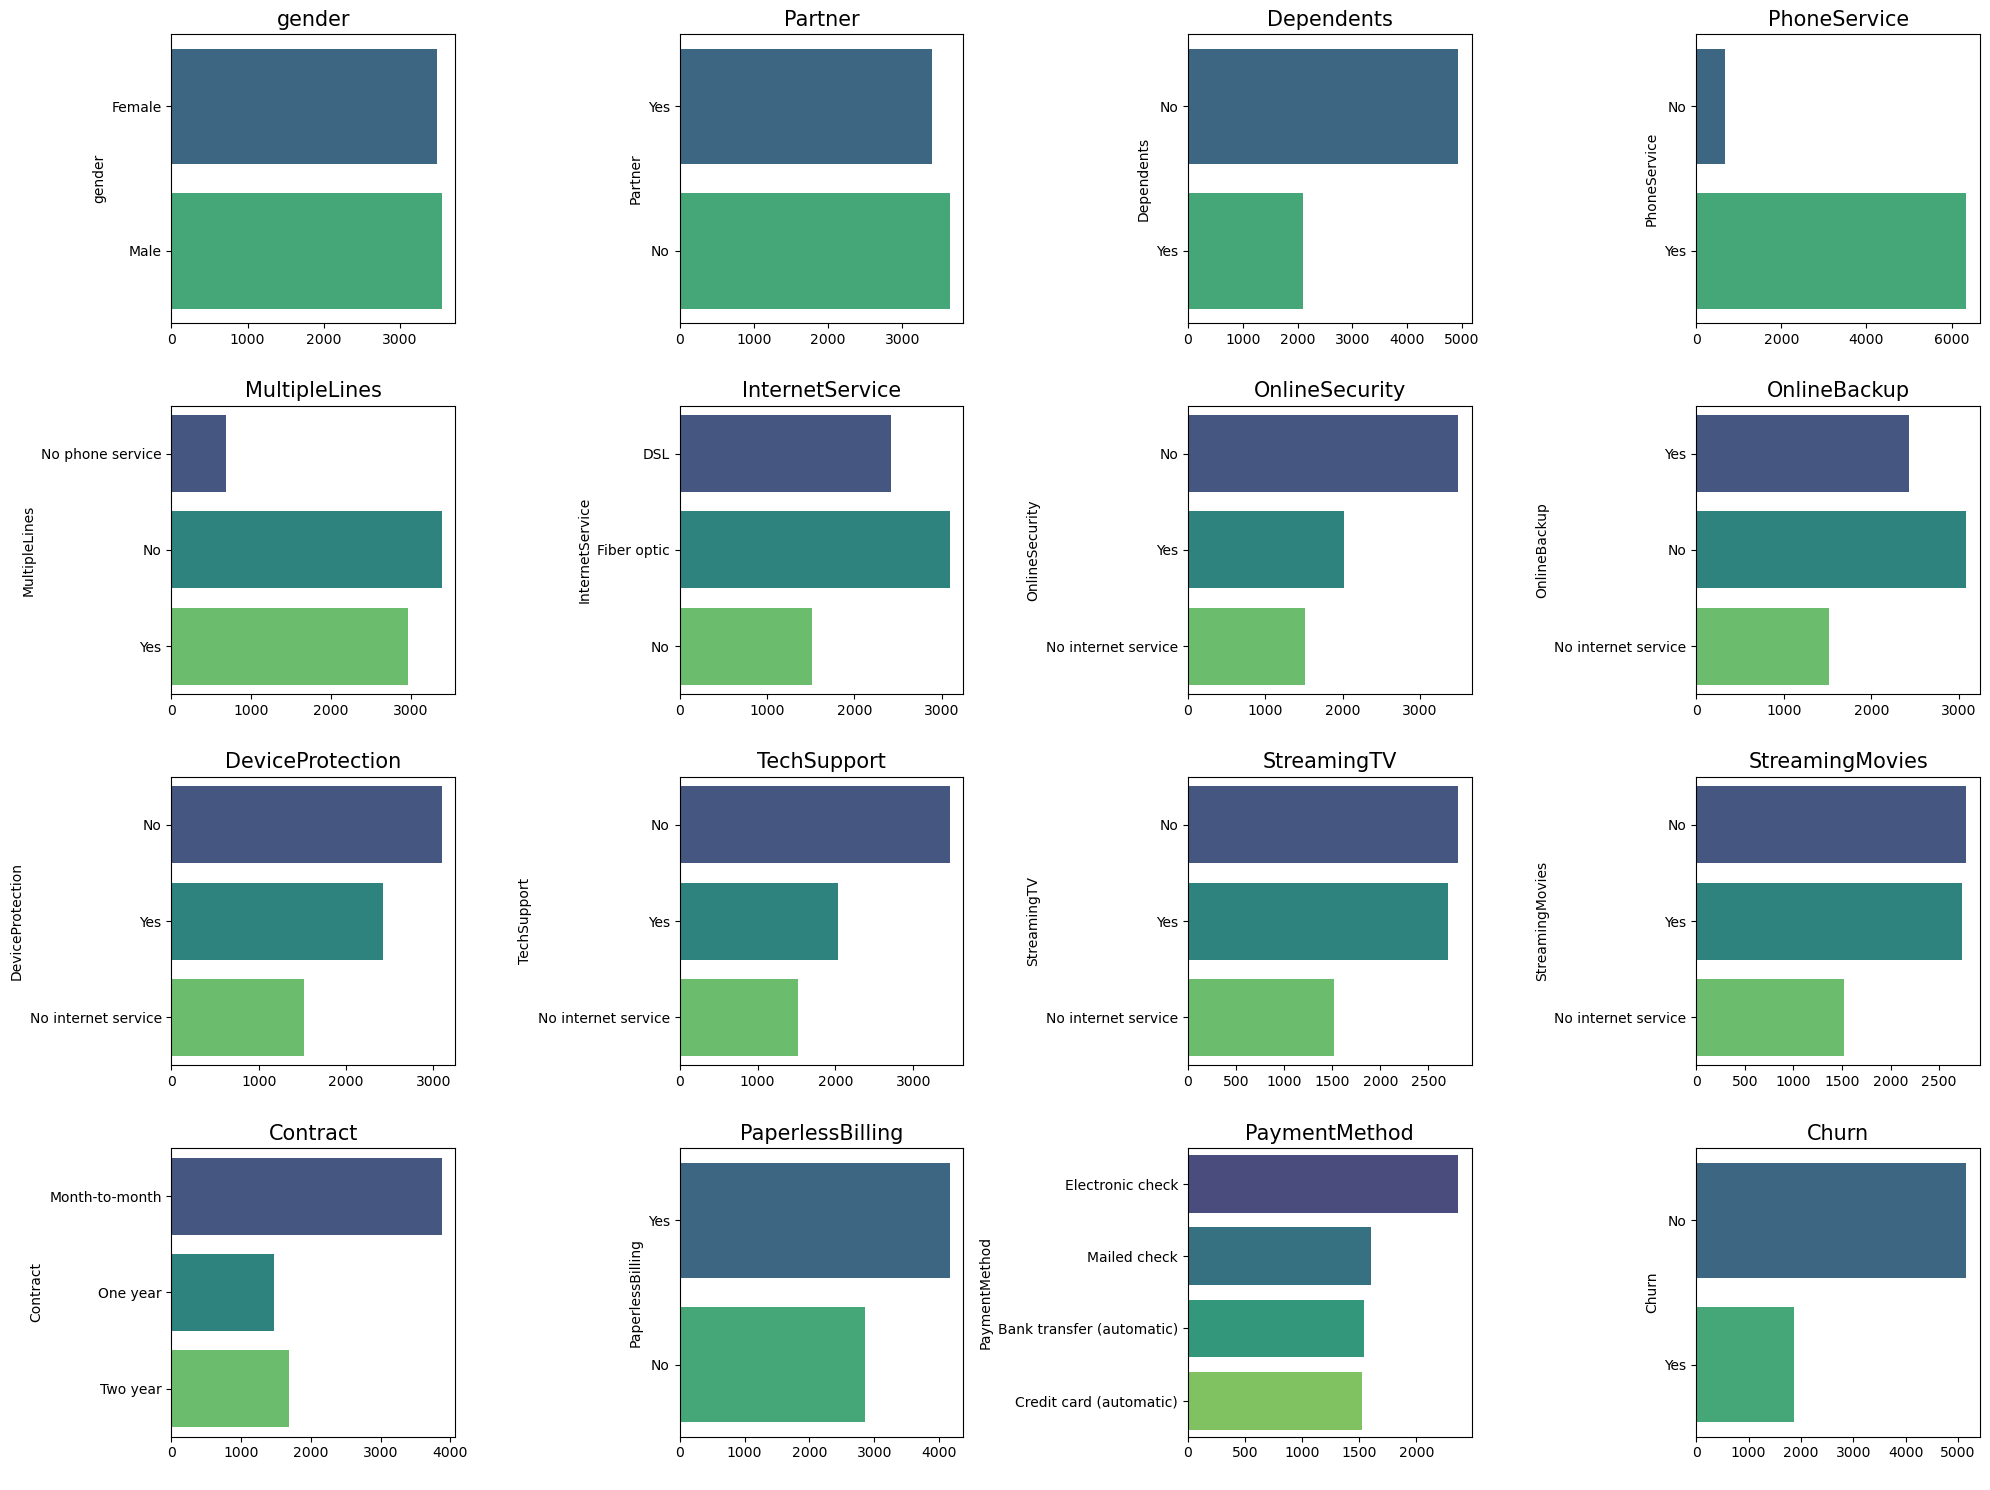

In [24]:
plt.figure(figsize=(20,15))
for i in range(0, len(cats)):
    plt.subplot(4,4,i+1)
    sns.countplot(y=eda[cats[i]], palette='viridis')
    plt.title(cats[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

### Numerical Feature Analysis

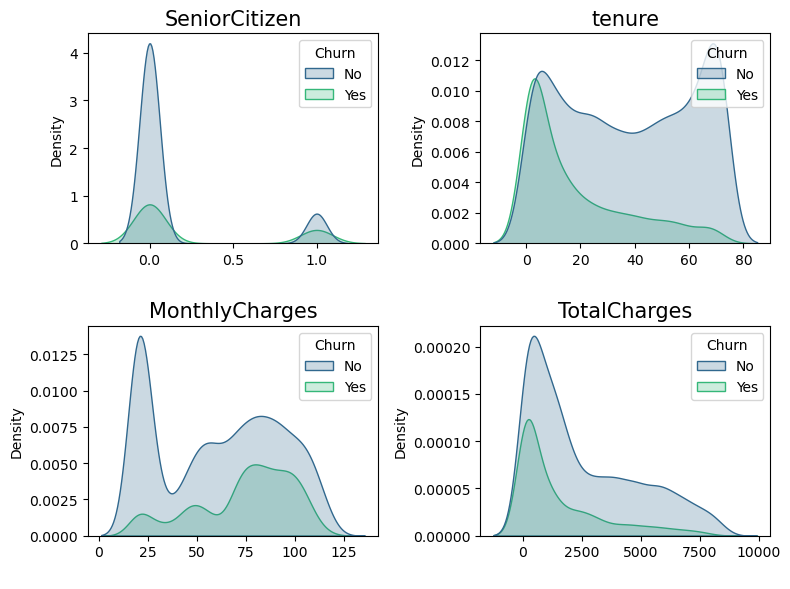

In [26]:
plt.figure(figsize=(8,6))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True, hue=eda['Churn'])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

### Categorical Feature Analysis

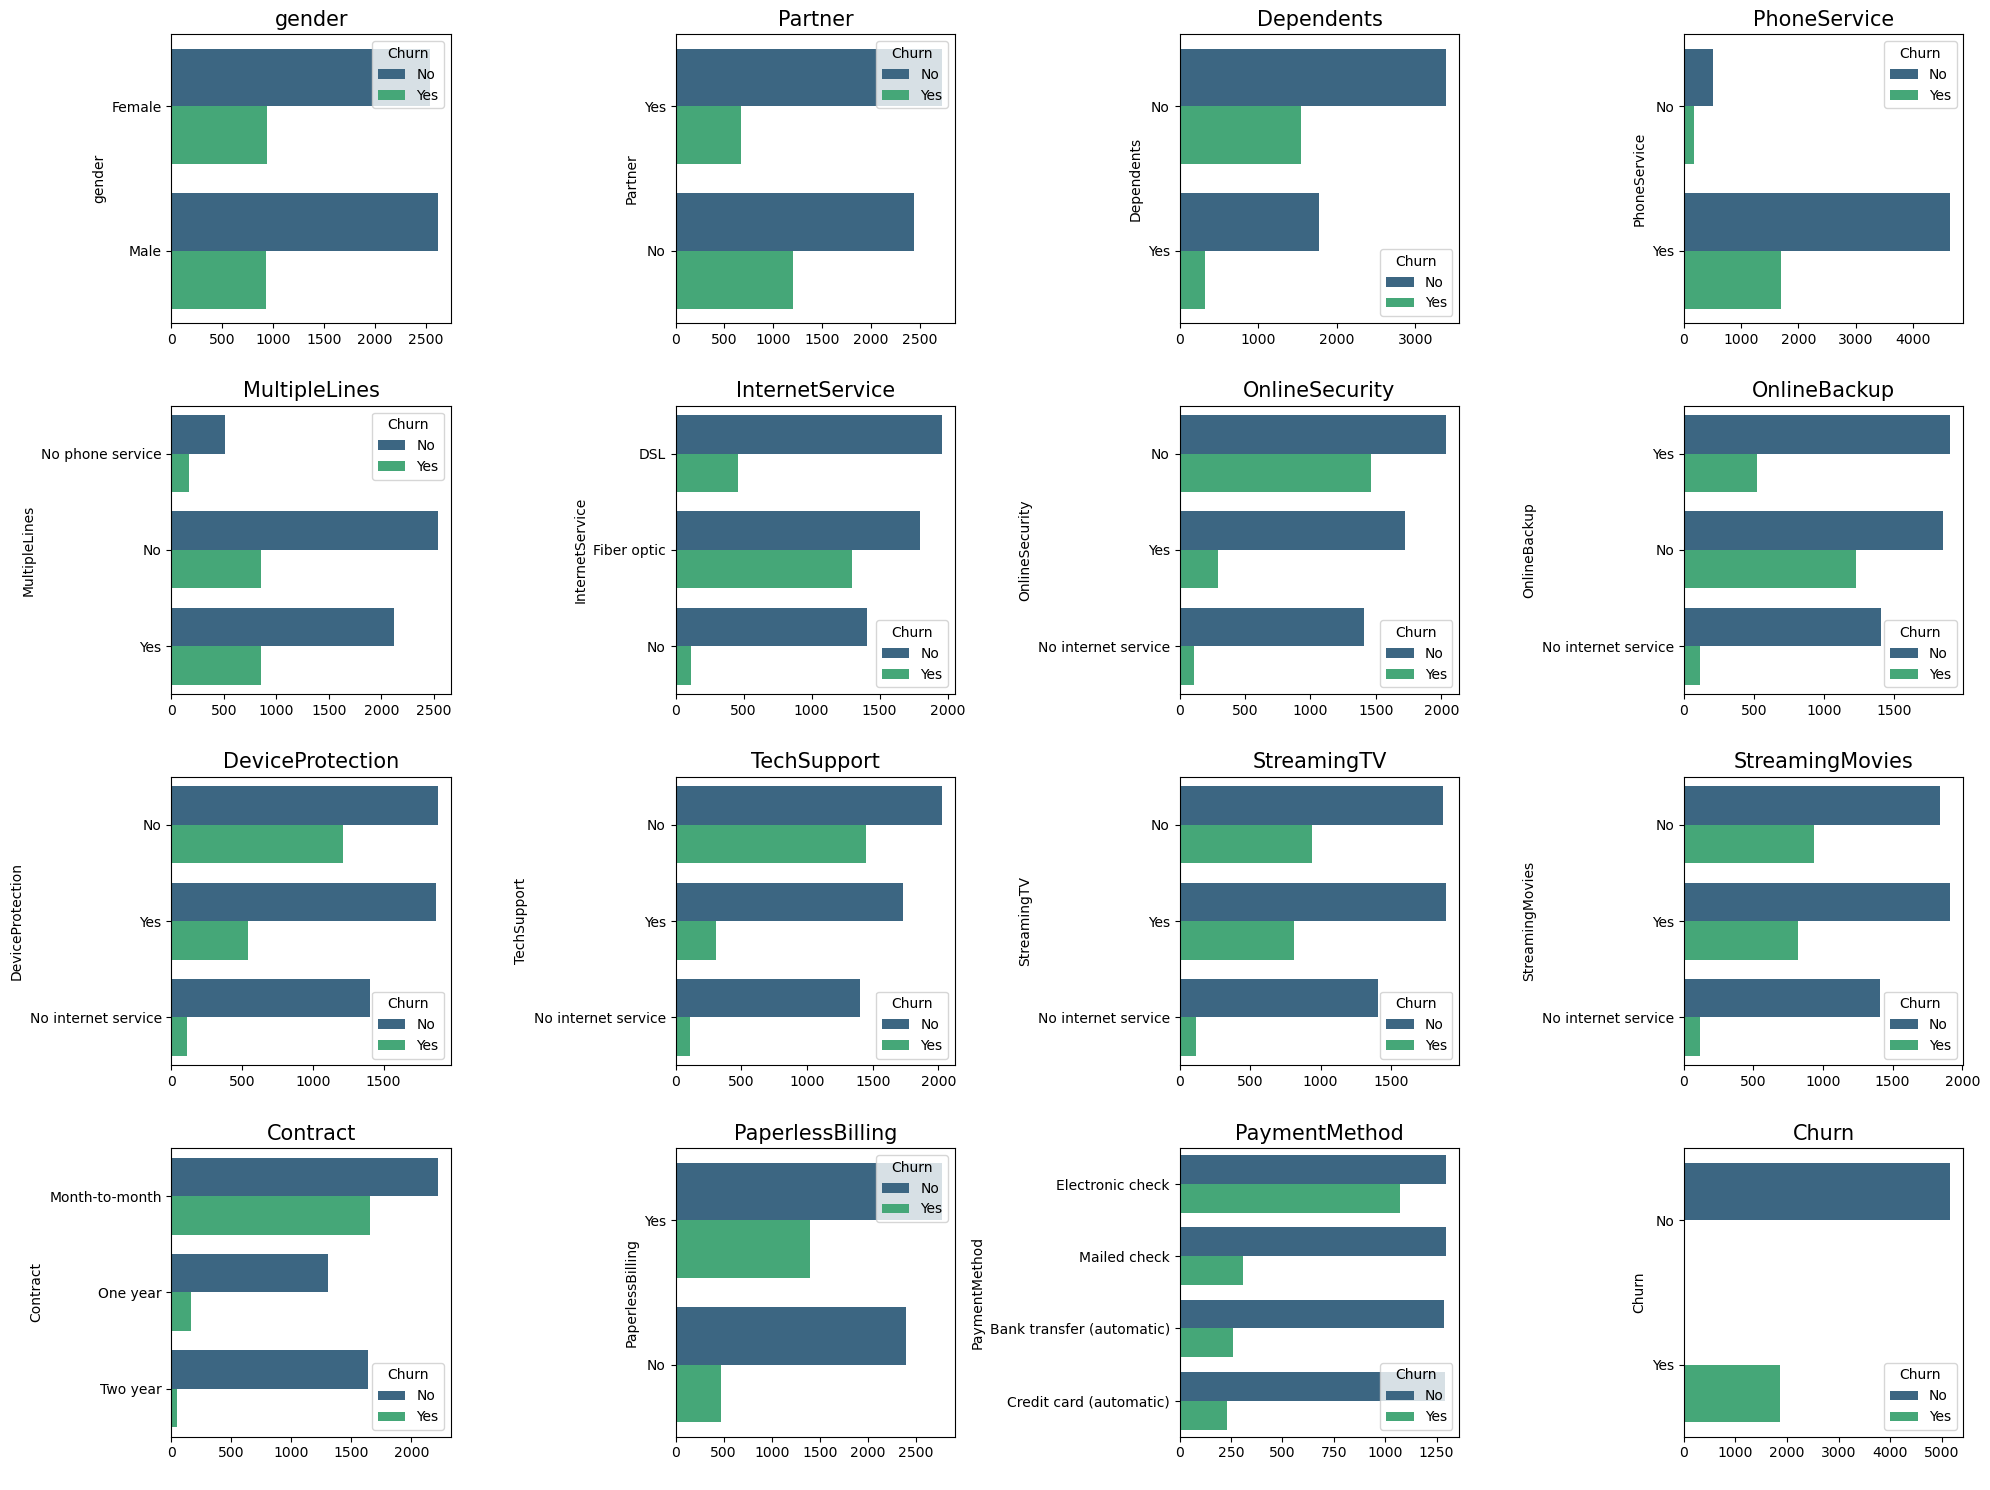

In [27]:
plt.figure(figsize=(20,15))
for i in range(0, len(cats)):
    plt.subplot(4,4,i+1)
    sns.countplot(y=eda[cats[i]], palette='viridis', hue=eda['Churn'])
    plt.title(cats[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

### Correlation Heatmap

<AxesSubplot:>

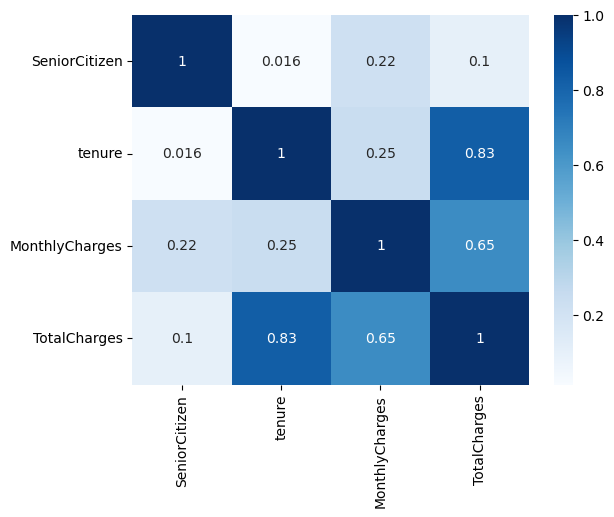

In [31]:
sns.heatmap(eda[num].corr(), annot=True, cmap='Blues')

### Pairplot

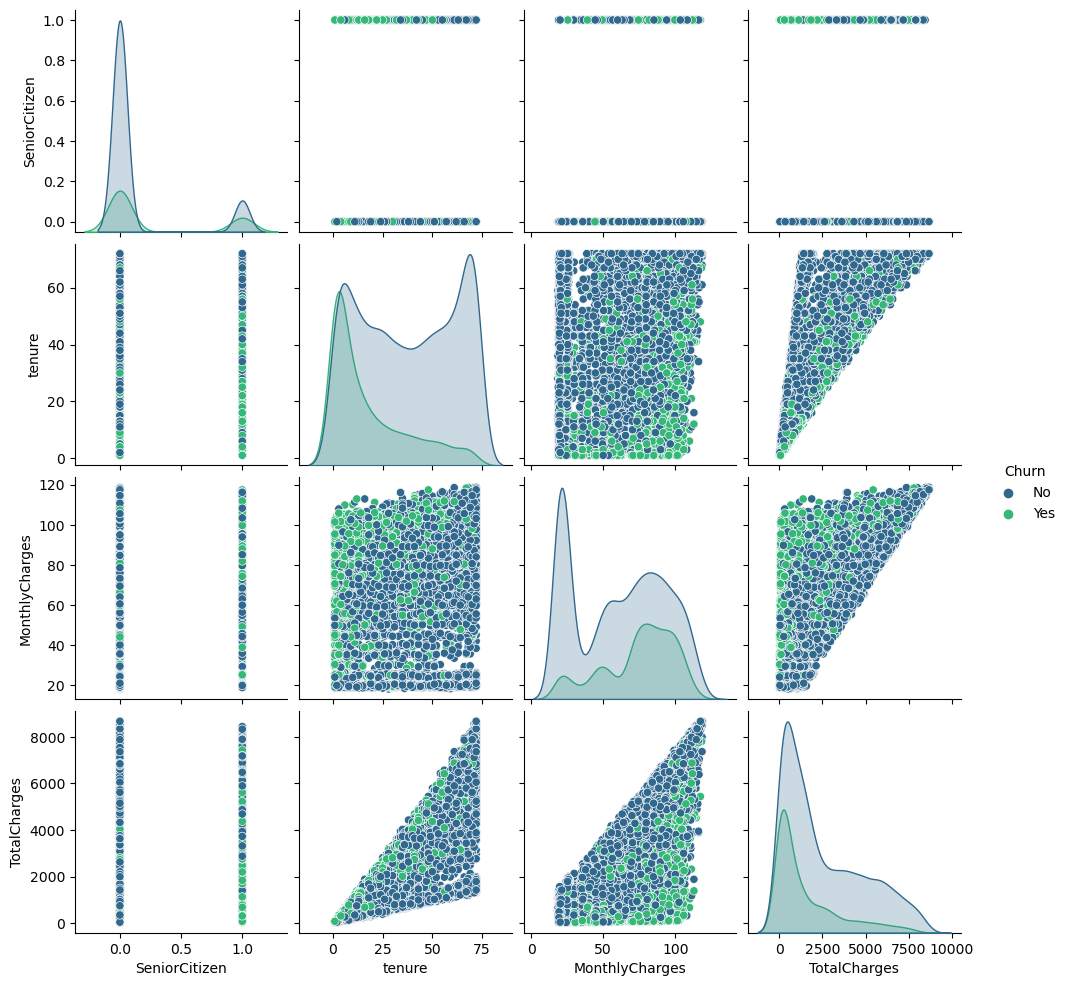

In [32]:
sns.pairplot(eda,hue='Churn',palette='viridis')

## Category vs Numeric Analysis

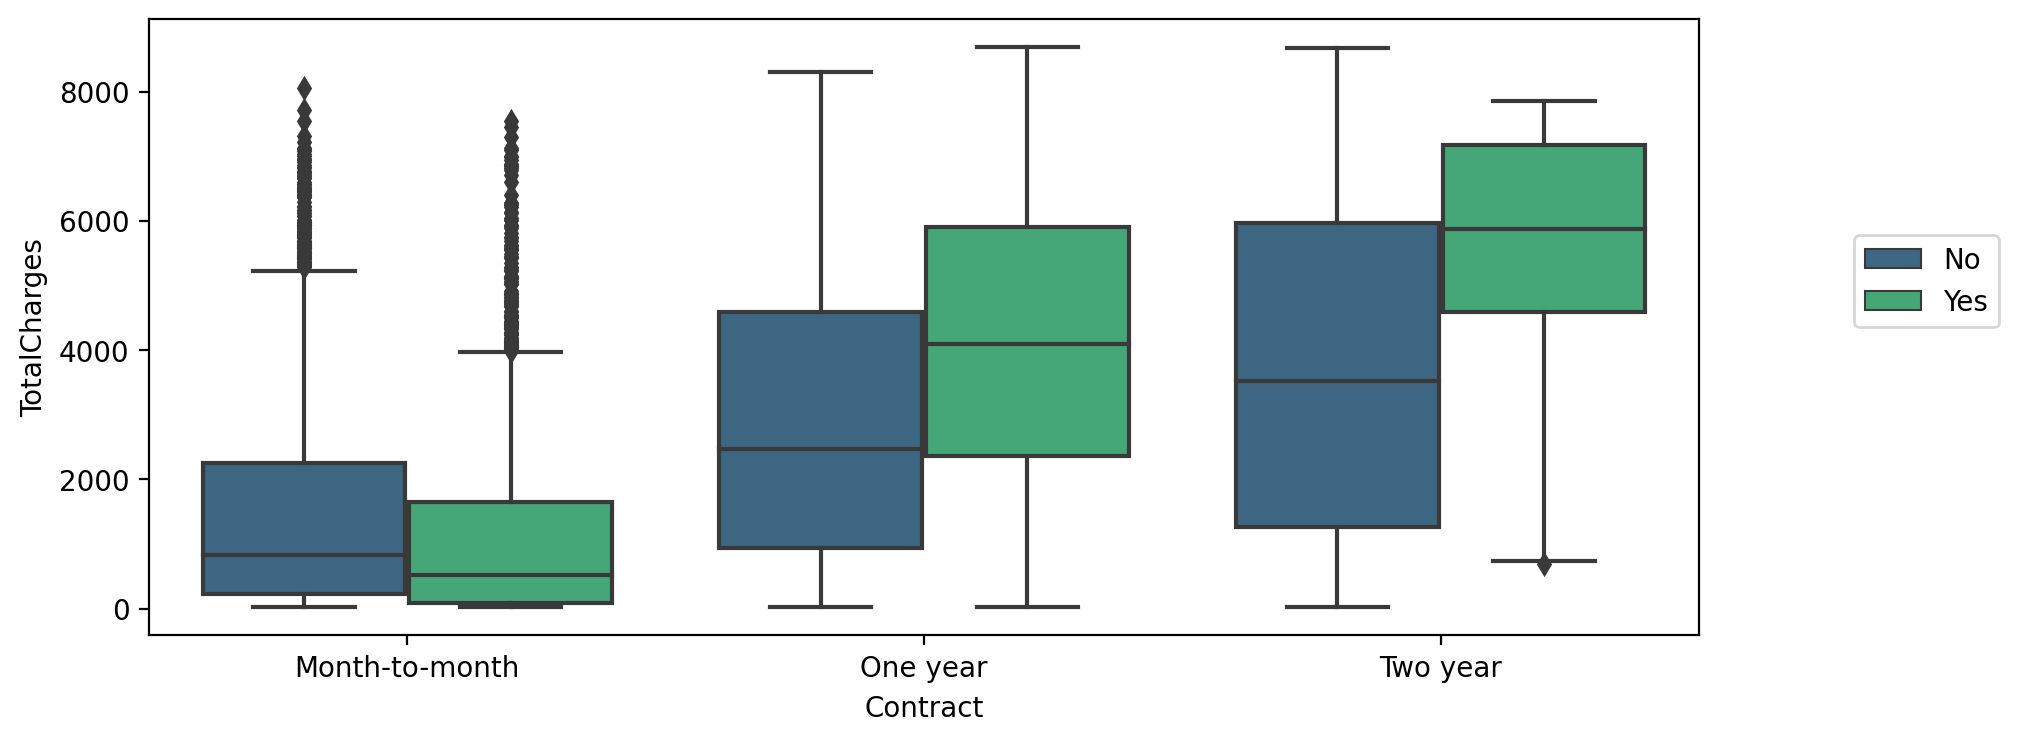

In [34]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=eda,y='TotalCharges',x='Contract',hue='Churn', palette='viridis')
plt.legend(loc=(1.1,0.5))

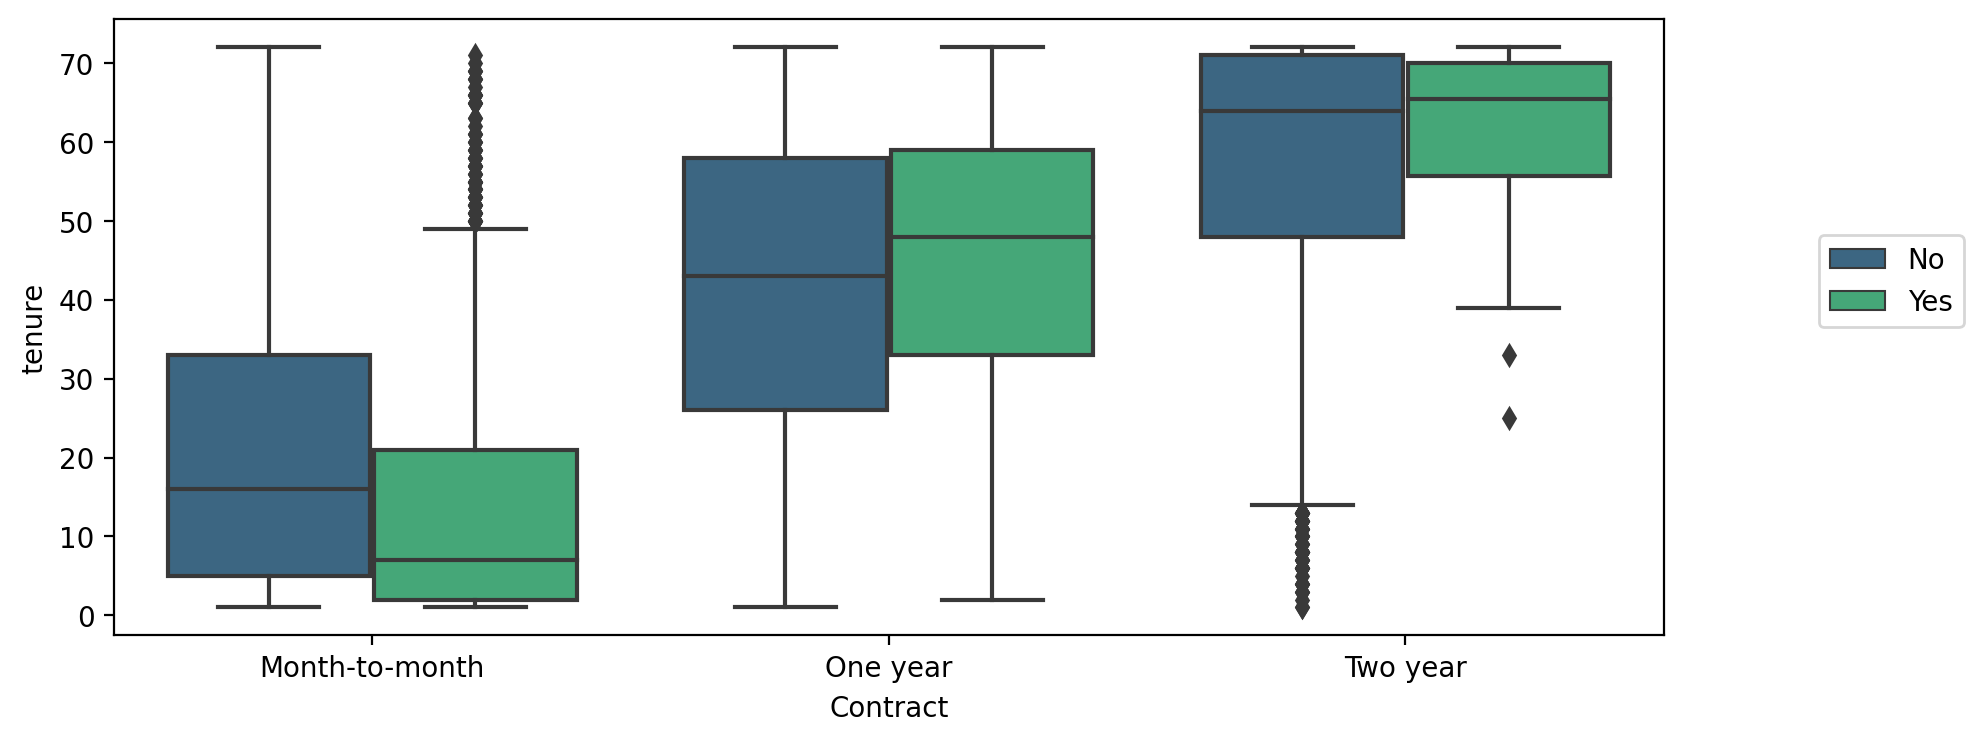

In [37]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=eda,y='tenure',x='Contract',hue='Churn', palette='viridis')
plt.legend(loc=(1.1,0.5))

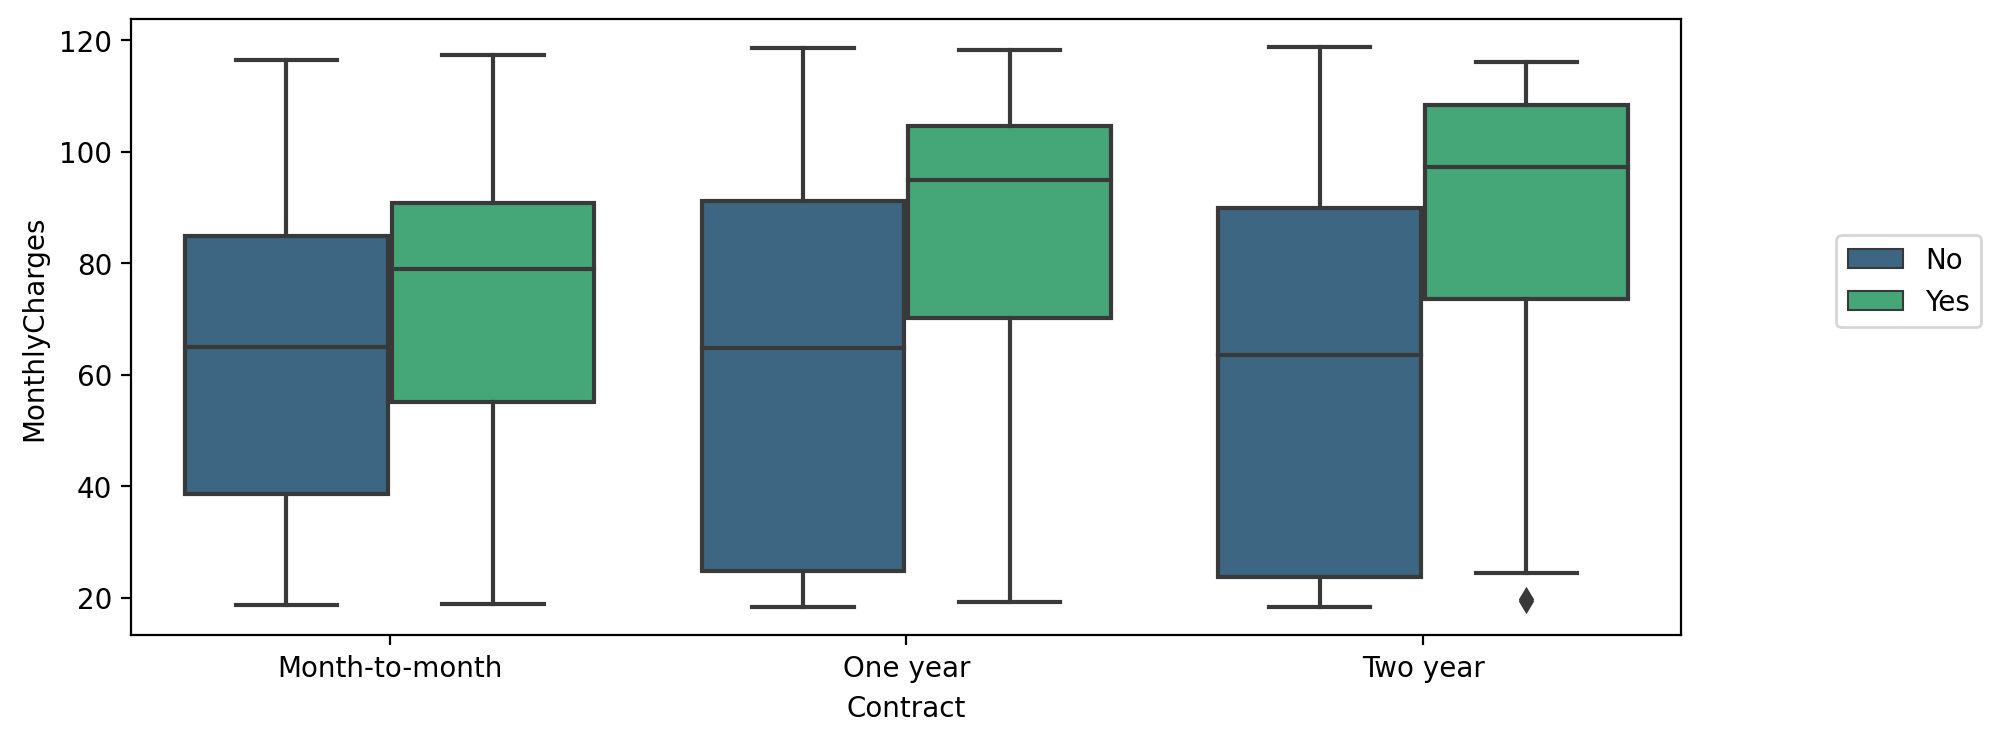

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=eda,y='MonthlyCharges',x='Contract',hue='Churn', palette='viridis')
plt.legend(loc=(1.1,0.5))

# Churn Analysis

segementing customers based on their tenure and perform cohorts analysis,thus allowing us to examine differences between customer cohort segments.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

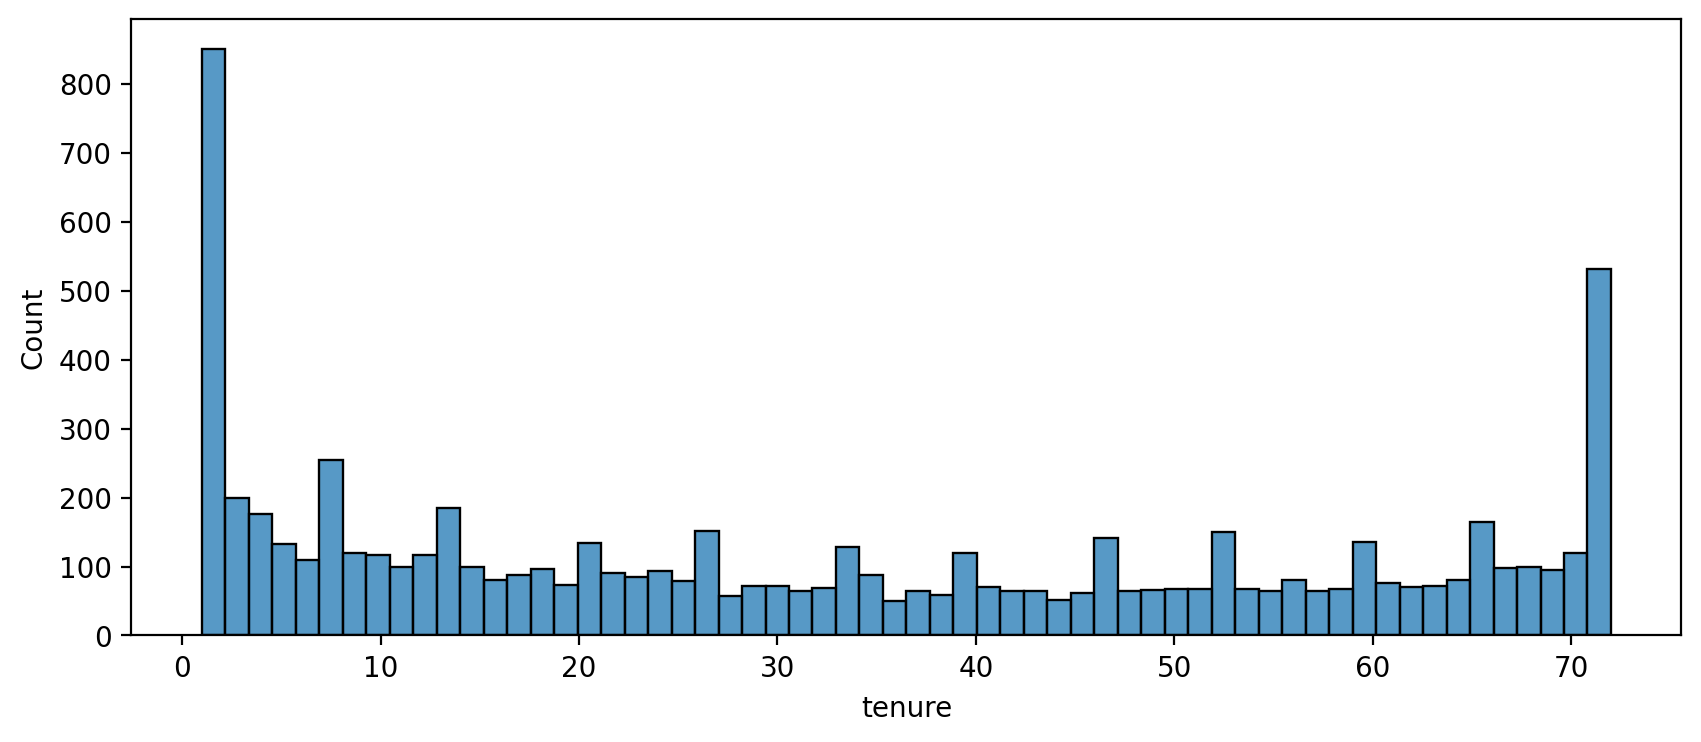

In [39]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

<Figure size 2000x600 with 0 Axes>

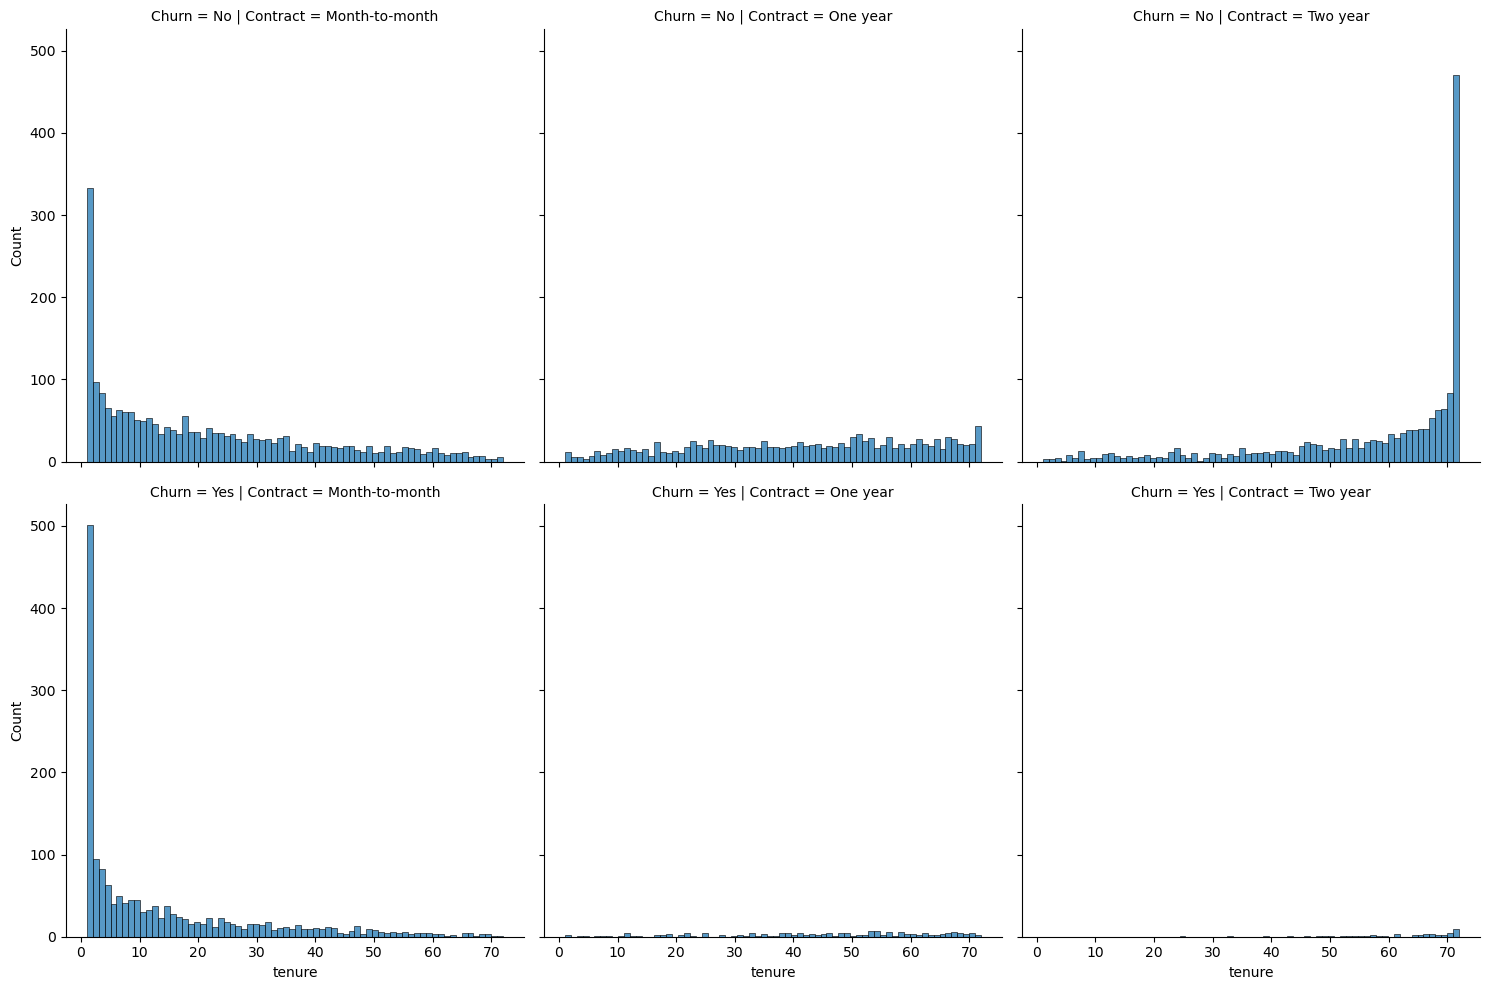

In [40]:
# histograms separated by two additional features, Churn and Contract
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

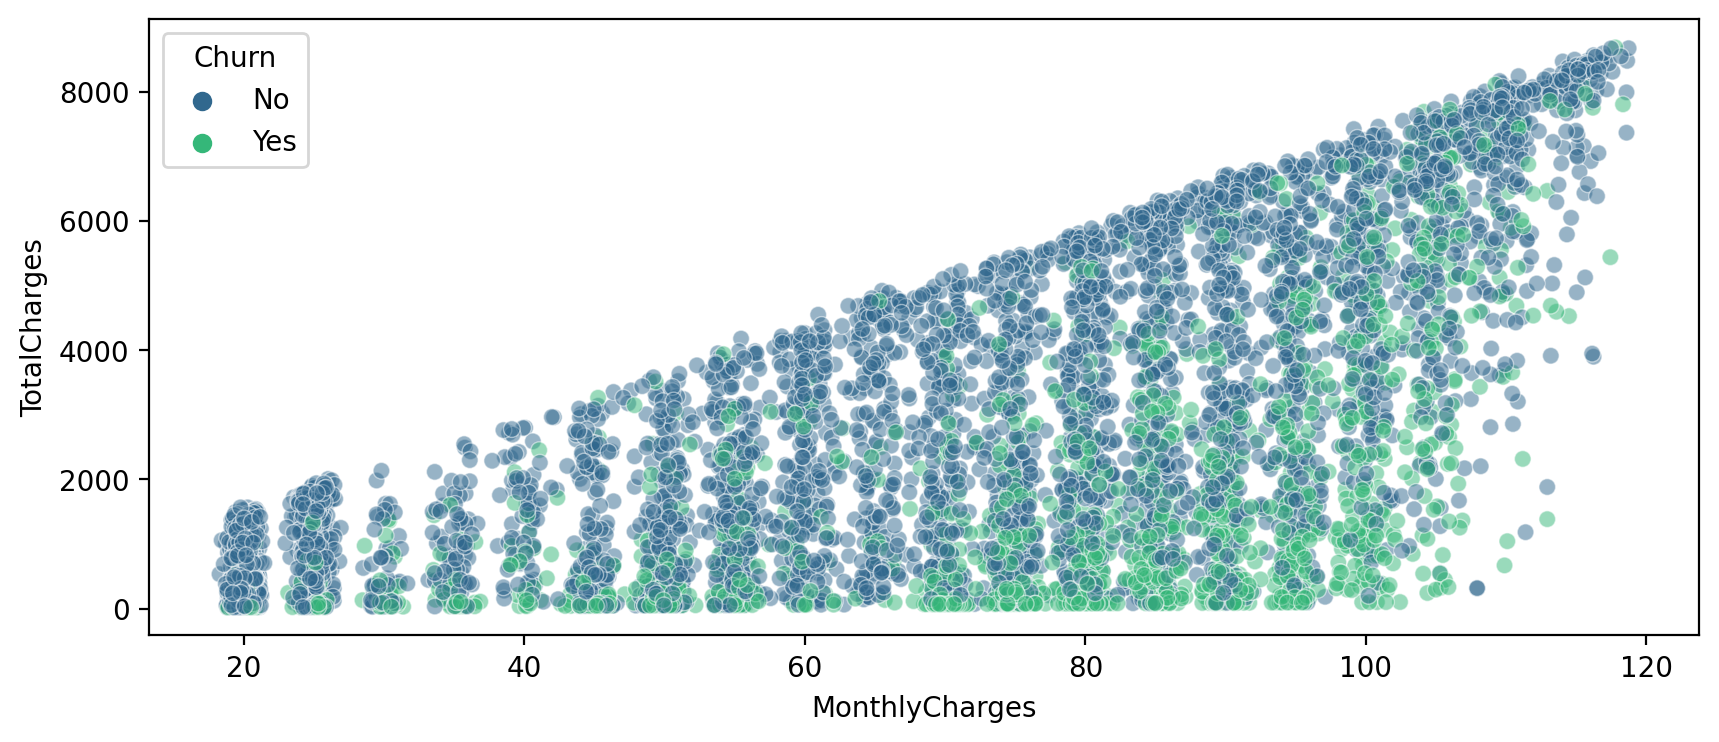

In [41]:
# scatter plot of Total Charges versus Monthly Charges
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='viridis')

## Cohort Based on Tenure

In [42]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [44]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [46]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
6     36.363636
7     38.931298
8     34.146341
9     38.655462
10    38.793103
11    31.313131
12    32.478632
13    34.862385
14    31.578947
15    37.373737
16    35.000000
17    29.885057
18    24.742268
19    26.027397
20    25.352113
21    26.984127
22    30.000000
23    15.294118
24    24.468085
25    29.113924
26    18.987342
27    18.055556
28    21.052632
29    20.833333
30    22.222222
31    24.615385
32    27.536232
33    21.875000
34    18.461538
35    17.045455
36    20.000000
37    23.076923
38    22.033898
39    25.000000
40    20.312500
41    20.000000
42    21.538462
43    23.076923
44    11.764706
45     9.836066
46    16.216216
47    20.588235
48    14.062500
49    22.727273
50    14.705882
51    11.764706
52    10.000000
53    20.000000
54    19.117647
55    14.062500
56    12.500000
57    12.307692
58    16.417910
59    13.333333
60     7.894737
61    10.526316
62     7.142857
6

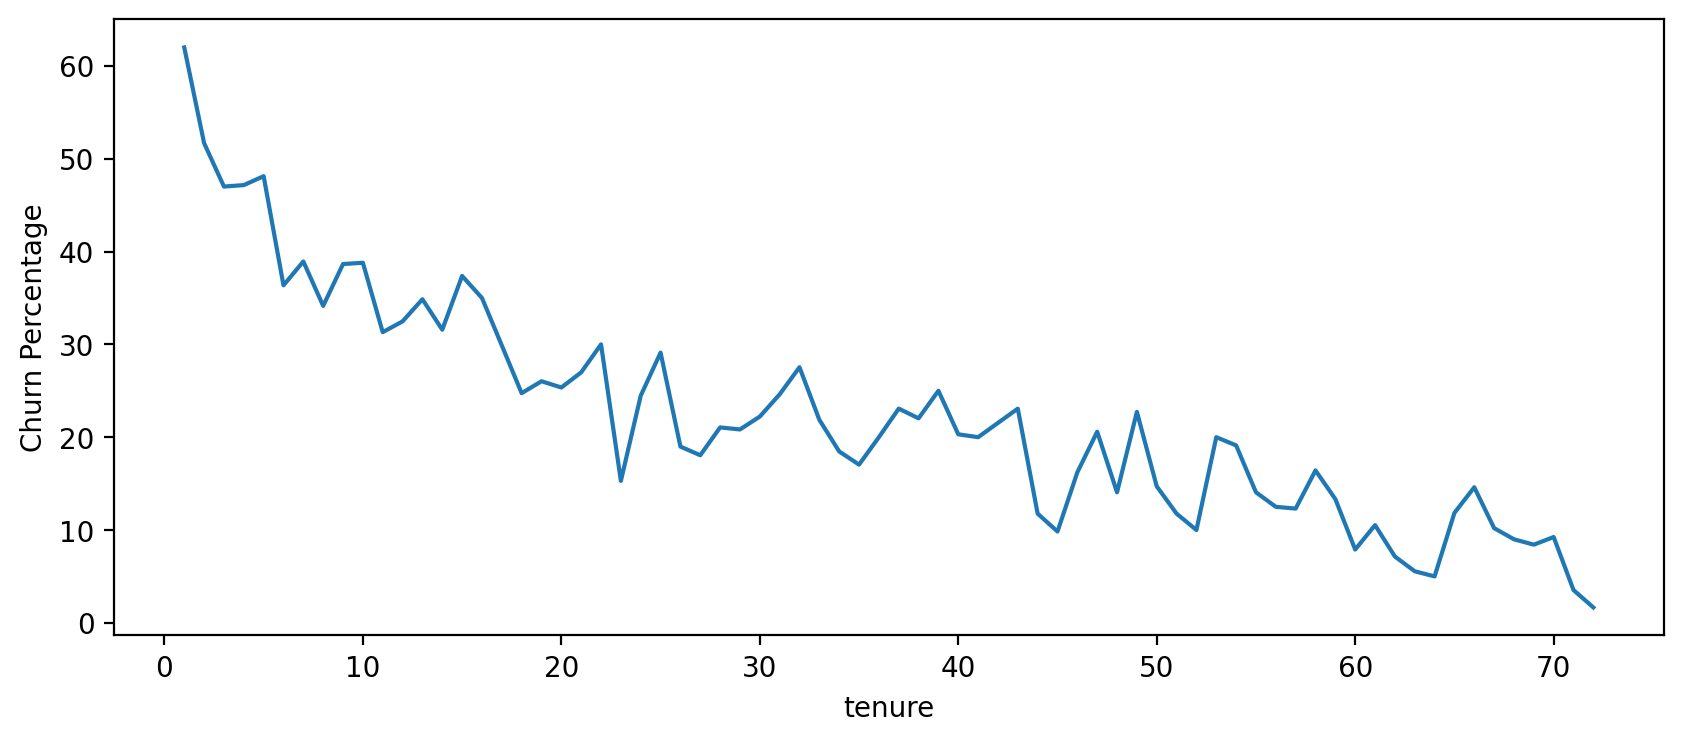

In [47]:
# plot
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

## Segmentation Based on Tenure Group
we devide into 4 group

In [48]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"
    
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [49]:
df.head(10)[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

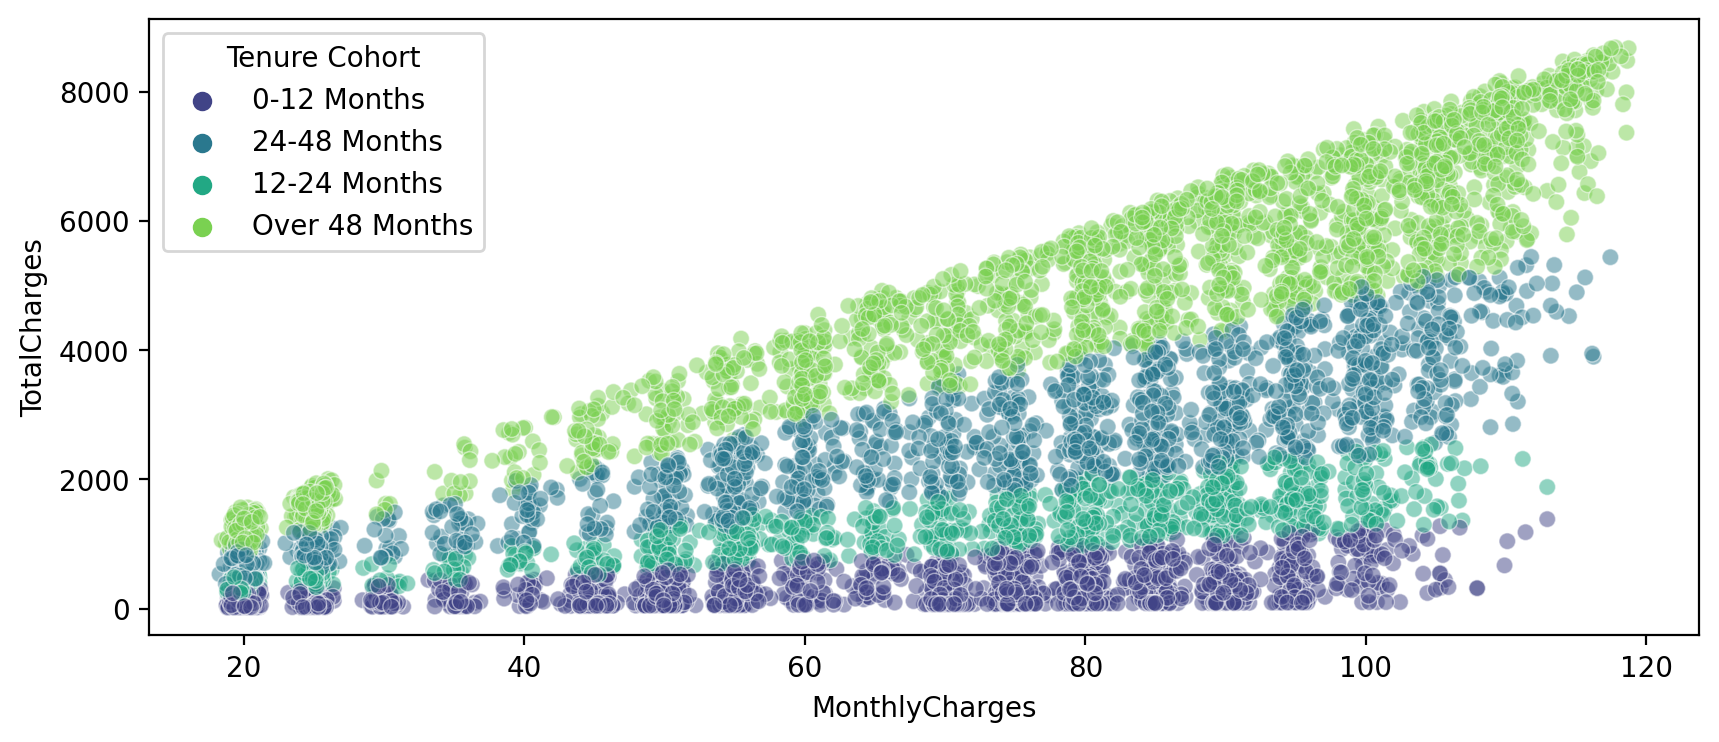

In [50]:
# scatter plot based on group
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='viridis')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

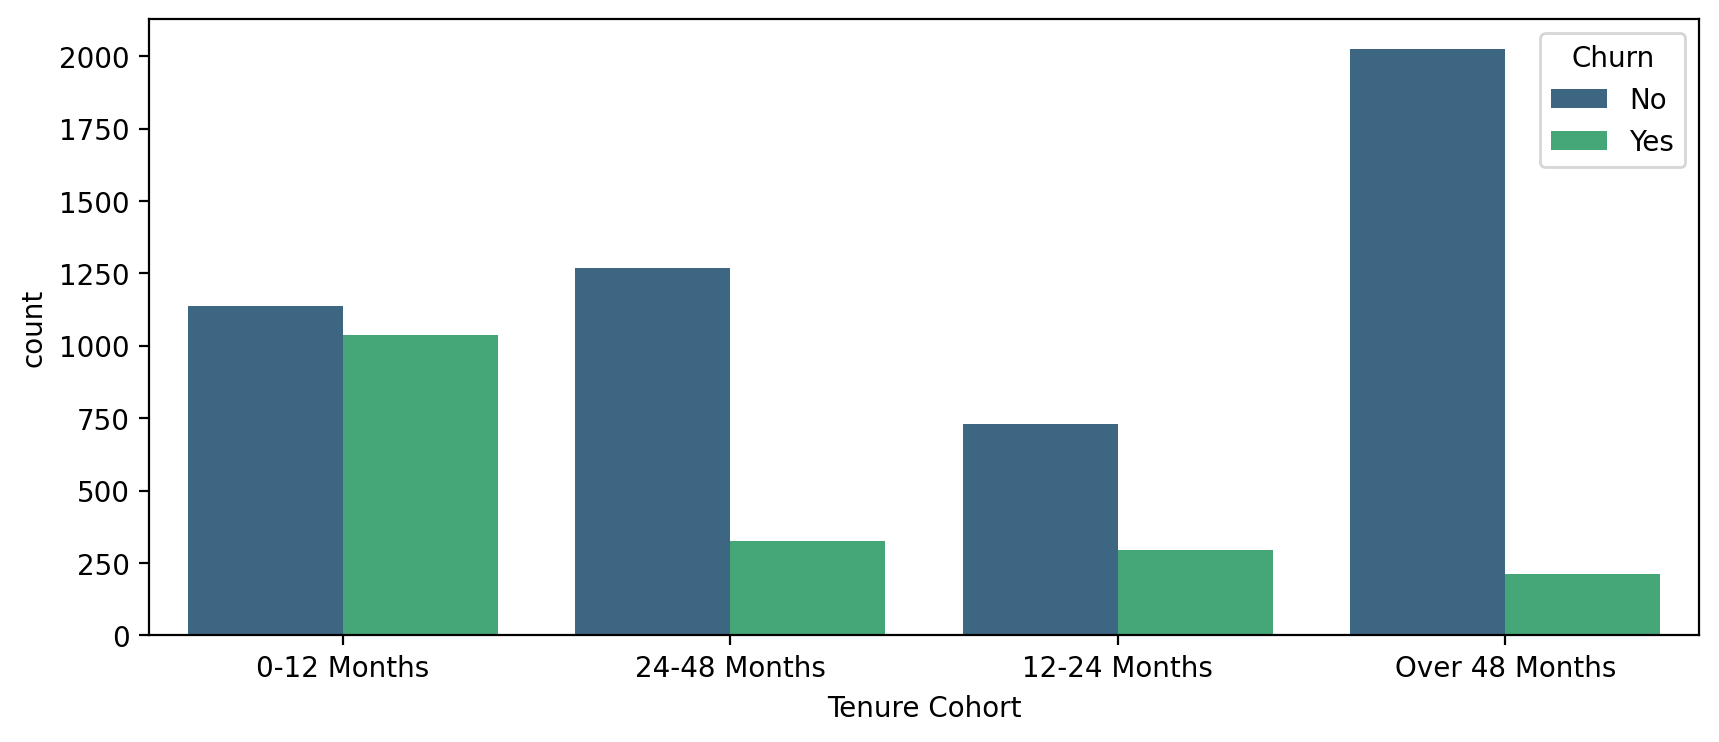

In [52]:
# count plot
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn', palette='viridis')

<Figure size 2000x800 with 0 Axes>

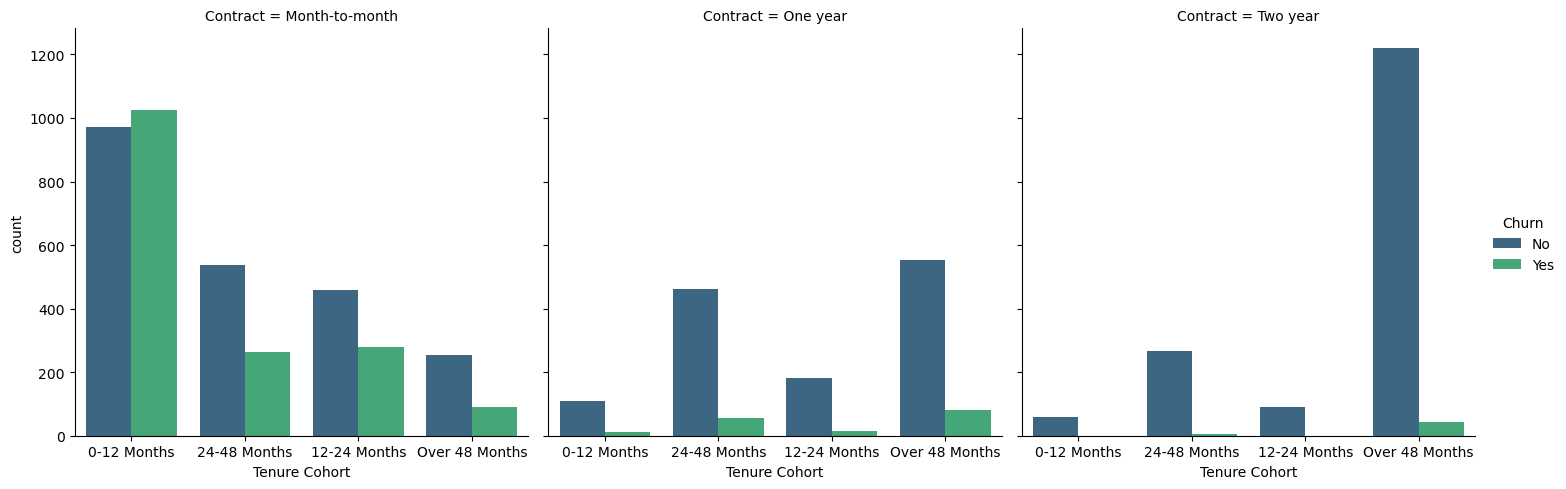

In [54]:
# counts per Tenure Cohort, separated out by contract type
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count', palette='viridis')

# Modeling

## Train Test Split

In [55]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [57]:
X_train.shape, X_test.shape

((6328, 33), (704, 33))

## Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

# model dt
dt = DecisionTreeClassifier(max_depth=6)

# fit
dt.fit(X_train,y_train)

# predict
preds = dt.predict(X_test)

# result
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



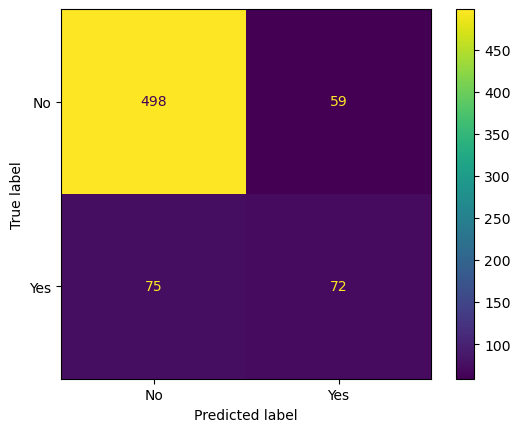

In [59]:
plot_confusion_matrix(dt,X_test,y_test)

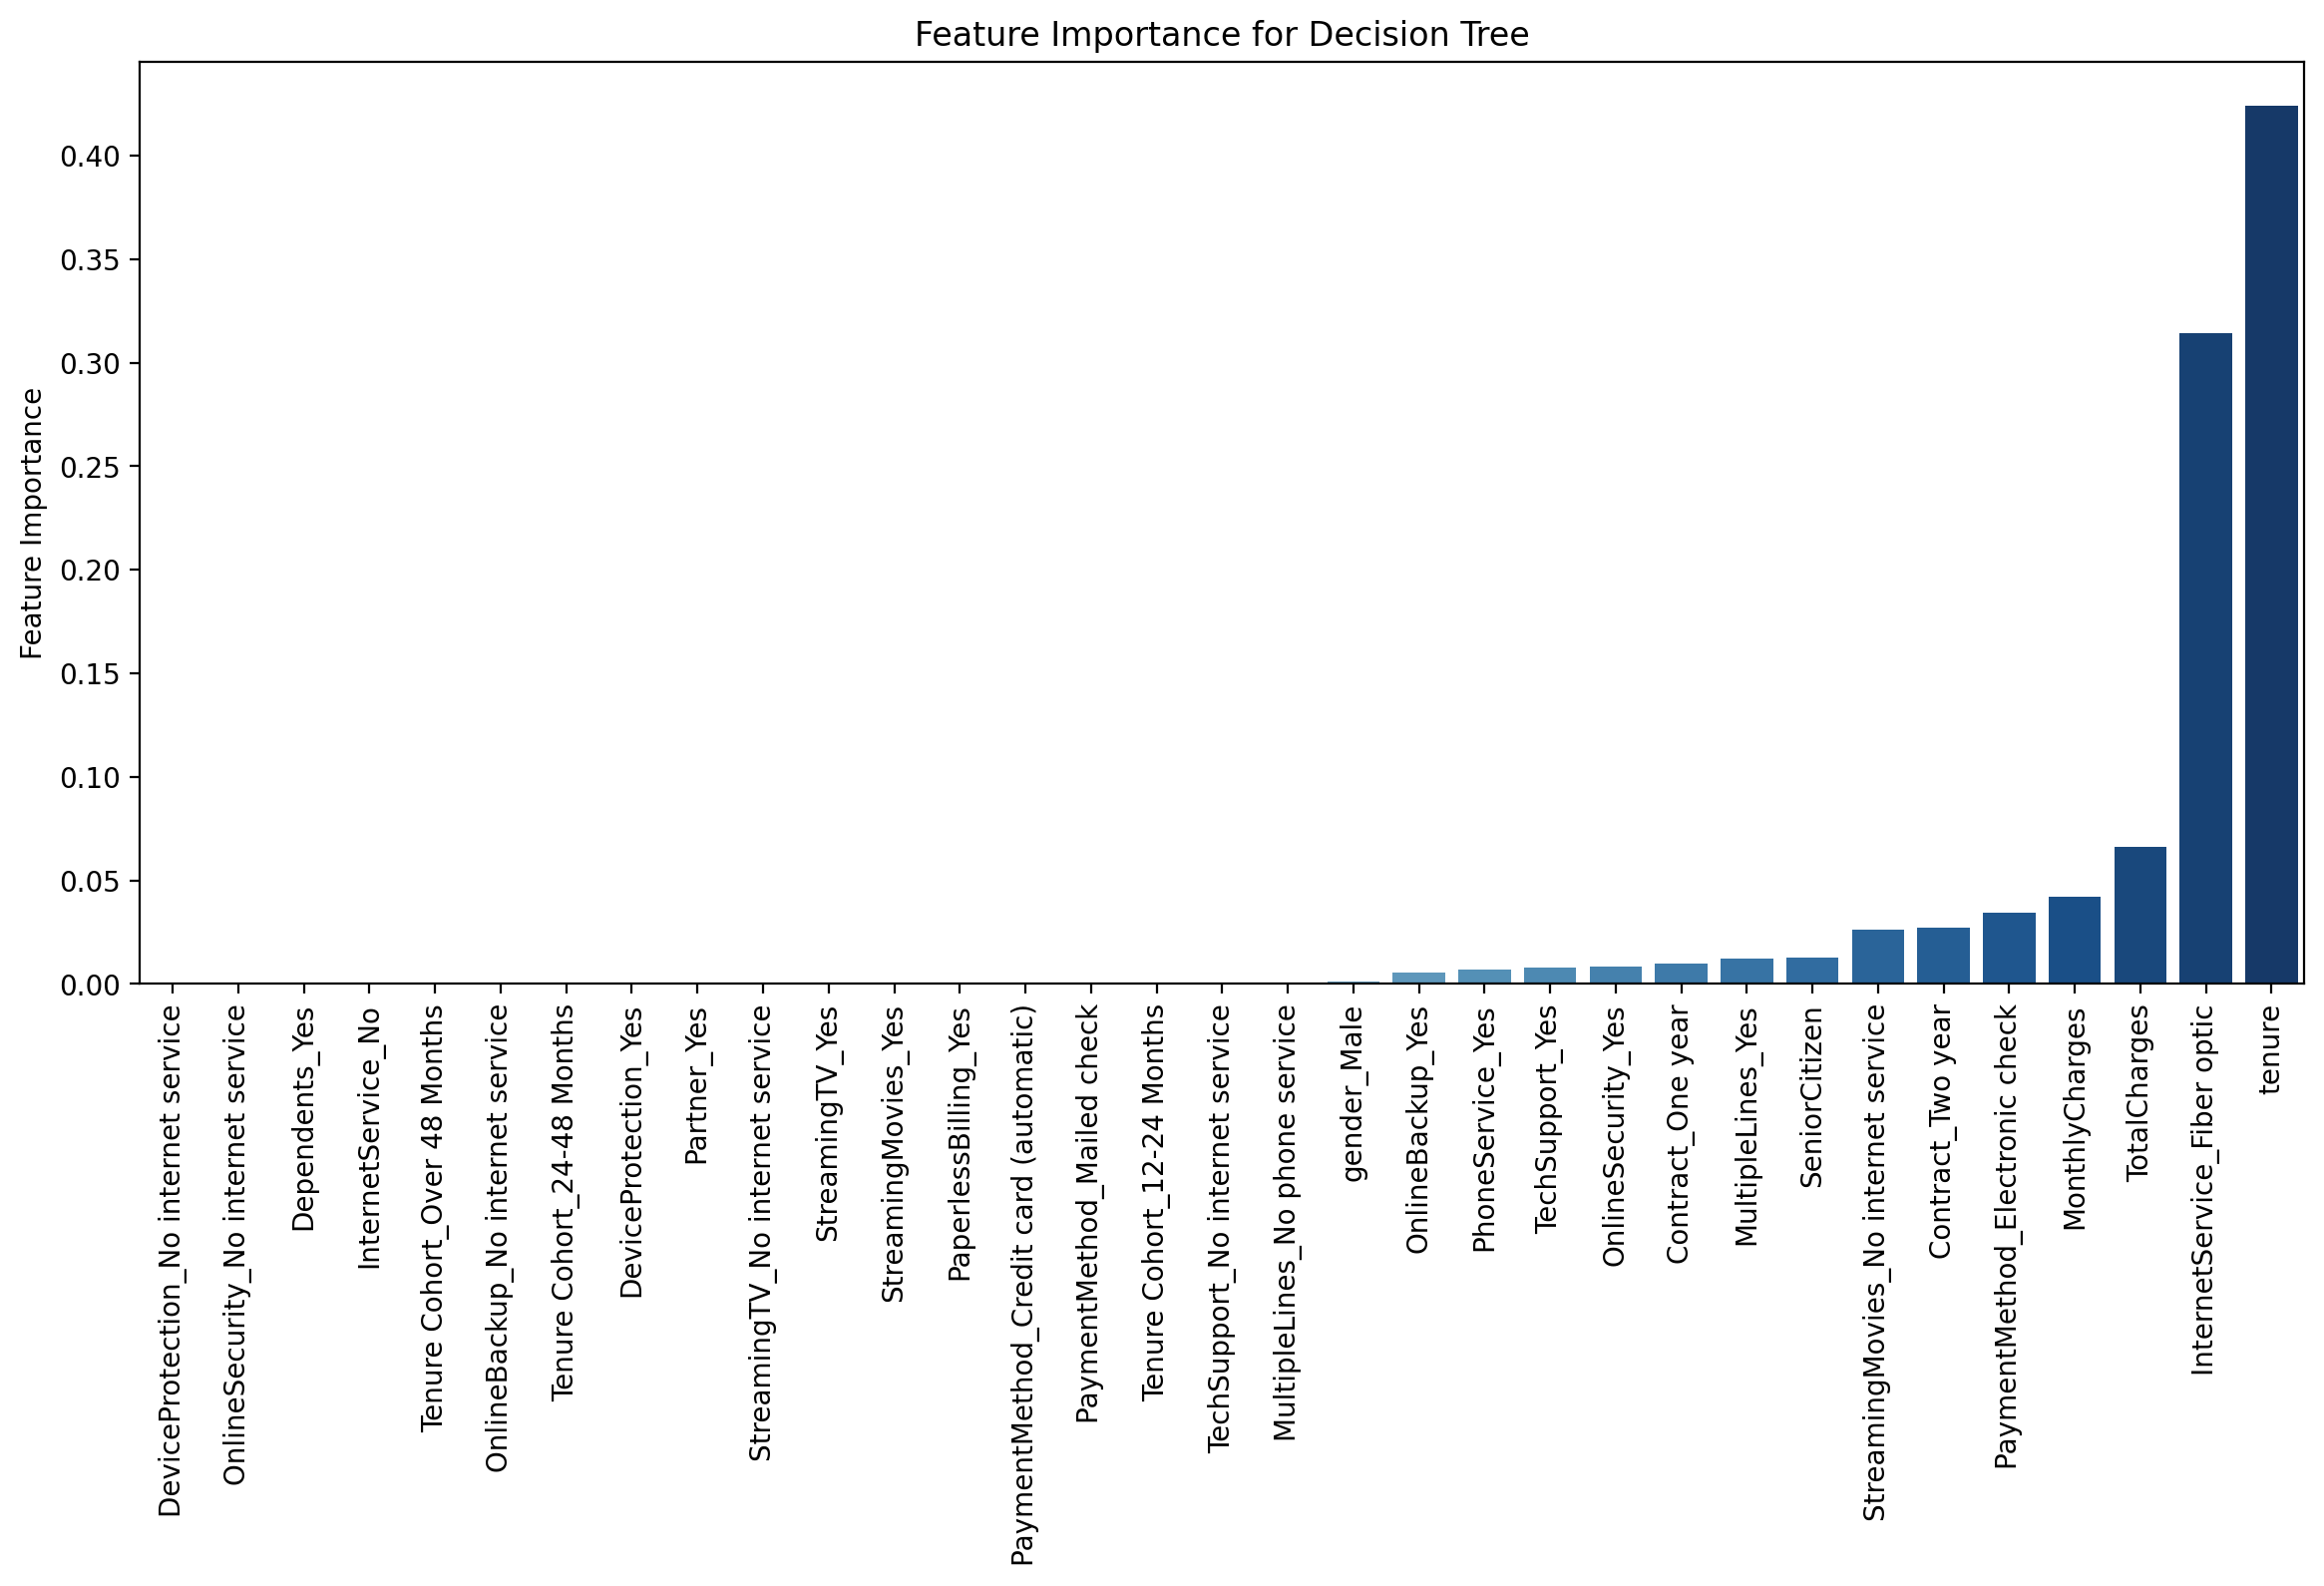

In [65]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,
                         index=X.columns,
                         columns=['Feature Importance']).sort_values("Feature Importance")

plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),
            x=imp_feats.sort_values('Feature Importance').index,
            y='Feature Importance', palette='Blues')

plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

# model
rf = RandomForestClassifier(n_estimators=100)

# fjt
rf.fit(X_train,y_train)

# predict
preds = rf.predict(X_test)

# score
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.45      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



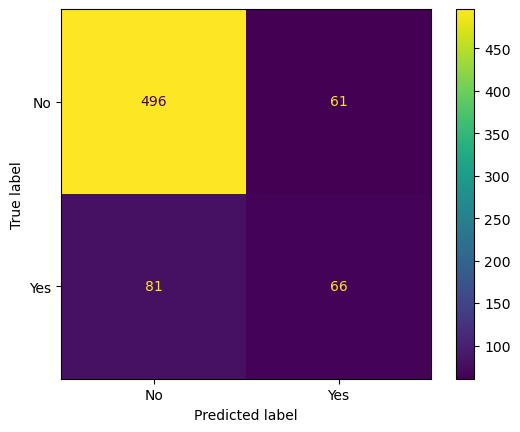

In [67]:
plot_confusion_matrix(rf,X_test,y_test)

## Ada Boost

In [69]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

ada_model = AdaBoostClassifier()

ada_model.fit(X_train,y_train)

preds = ada_model.predict(X_test)

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



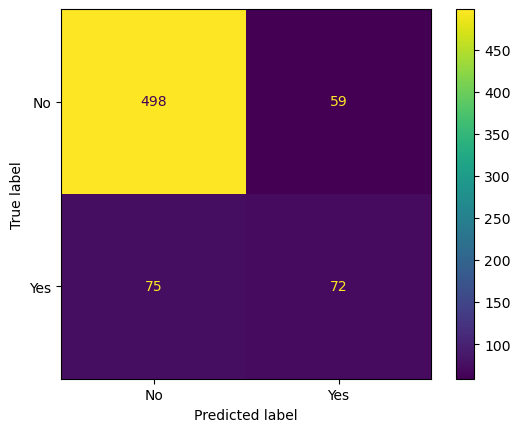

In [70]:
plot_confusion_matrix(dt,X_test,y_test)